In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os 
os.chdir("/content/drive/MyDrive/DataSet")

In [ ]:
# direcciones carpetas de objetos de entrenamiento
train_Enderman_dir=os.path.join("Train/Enderman")
train_Panda_dir=os.path.join("Train/Panda")
train_Slime_dir=os.path.join("Train/Slime")


In [ ]:
# direcciones carpetas de objetos de validacion
validation_Enderman_dir=os.path.join("Validation/Enderman")
validation_Panda_dir=os.path.join("Validation/Panda")
validation_Slime_dir=os.path.join("Validation/Slime")


In [ ]:
train_Enderman_names = os.listdir(train_Enderman_dir)
print(train_Enderman_names[0:10])

validation_Enderman_names = os.listdir(validation_Enderman_dir)
print(validation_Enderman_names[0:10])


['Enderman_1.jpg', 'Enderman_2.jpg', 'Enderman_3.jpg', 'Enderman_4.jpg', 'Enderman_5.jpg', 'Enderman_6.jpg', 'Enderman_7.jpg', 'Enderman_8.jpg', 'Enderman_9.jpg', 'Enderman_10.jpg']
['Enderman_1.jpg', 'Enderman_3.jpg', 'Enderman_2.jpg', 'Enderman_6.jpg', 'Enderman_4.jpg', 'Enderman_5.jpg', 'Enderman_7.jpg', 'Enderman_8.jpg', 'Enderman_9.jpg', 'Enderman_11.jpg']


In [ ]:
print("Datos Entrenamiento")
print("Imagenes Enderman :",len(os.listdir(train_Enderman_dir)))
print("Imagenes Panda :",len(os.listdir(train_Panda_dir)))
print("Imagenes Slime :",len(os.listdir(train_Slime_dir)))


Datos Entrenamiento
Imagenes Enderman : 250
Imagenes Panda : 250
Imagenes Slime : 250


In [ ]:
print("Datos Validacion")
print("Imagenes Enderman :",len(os.listdir(validation_Enderman_dir)))
print("Imagenes Panda :",len(os.listdir(validation_Panda_dir)))
print("Imagenes Slime :",len(os.listdir(validation_Slime_dir)))


Datos Validacion
Imagenes Enderman : 100
Imagenes Panda : 100
Imagenes Slime : 100


In [ ]:
import tensorflow as tf
from tensorflow import keras
model = keras.models.Sequential([
                                 #Capa 1    640,480
                                 keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (360,360,3)),
                                 keras.layers.MaxPooling2D(2,2),
                                 #Capa 2
                                 keras.layers.Conv2D(36,(3,3),activation='relu'),
                                 keras.layers.MaxPooling2D(2,2),
                                 #Capa 3
                                 keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 keras.layers.MaxPooling2D(2,2),
                                 #Capa 4
                                 keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 keras.layers.MaxPooling2D(2,2),
                                 #Capa 5
                                 keras.layers.Conv2D(32,(3,3),activation='relu'),
                                 keras.layers.MaxPooling2D(2,2),
                                 keras.layers.Dropout(0.2), 
                                 #Capa 6
                                 keras.layers.Conv2D(16,(3,3),activation='relu'),
                                 keras.layers.MaxPooling2D(2,2),
                                 keras.layers.Dropout(0.2), 
                                 #Capa aplanado
                                 keras.layers.Flatten(),
                                 #Capa densa 1
                                 keras.layers.Dense(128, activation = 'relu'),
                                 keras.layers.Dropout(0.2),   
                                 #Capa densa 2
                                 keras.layers.Dense(64, activation = 'relu'),
                                 keras.layers.Dropout(0.2),  
                                 #Capa de salida
                                 keras.layers.Dense(3, activation = tf.nn.softmax),                                                              
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 358, 358, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 179, 179, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 177, 177, 36)      5220      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 88, 88, 36)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 64)        20800     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 43, 43, 64)       0

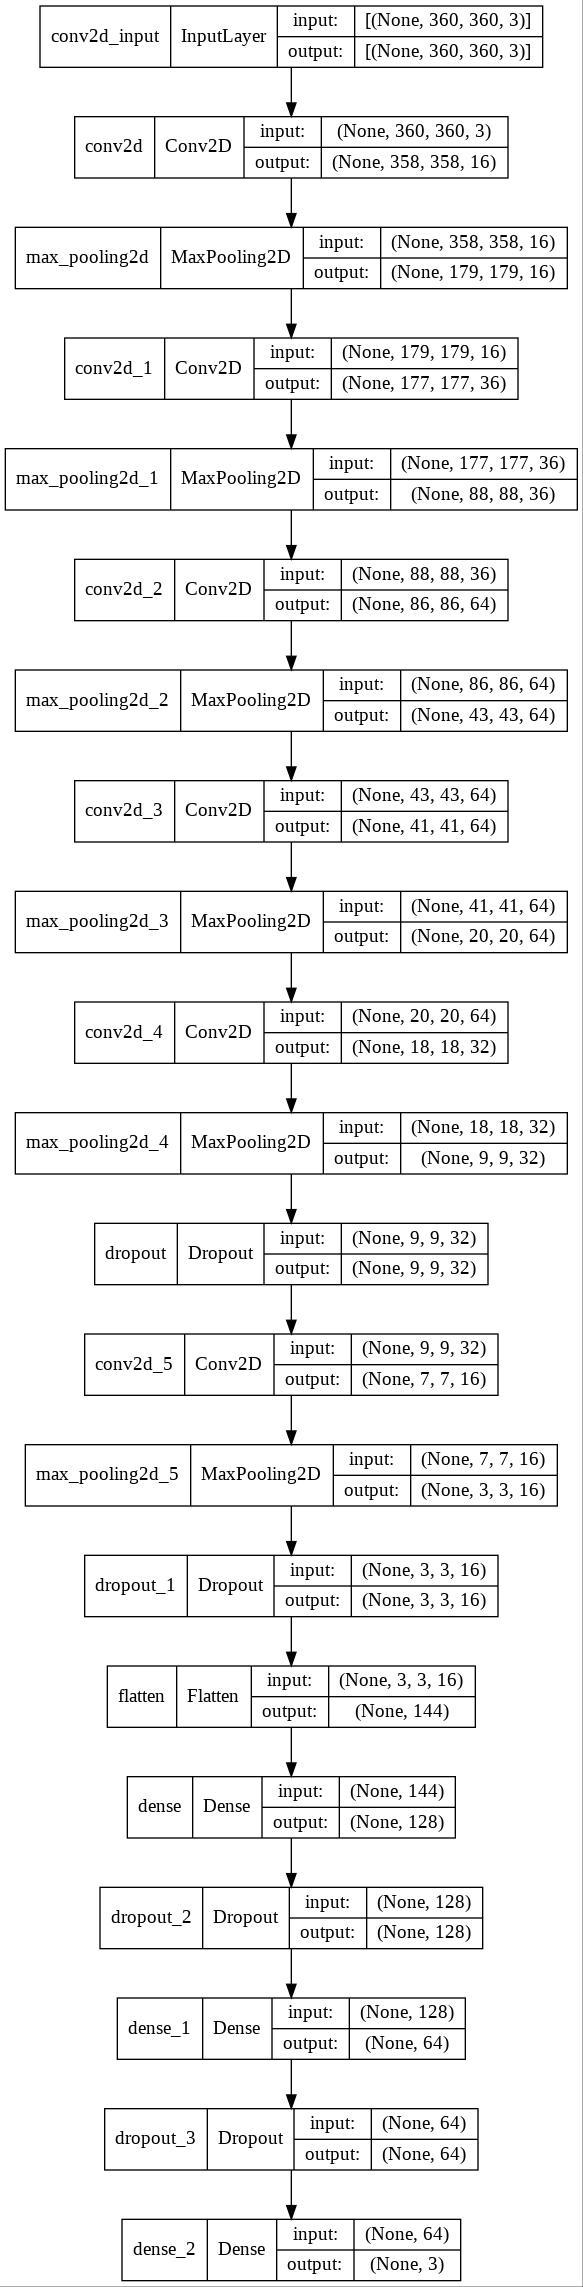

In [ ]:
# Graficamos el modelo de la red
keras.utils.plot_model(model,"My_model.jpg",show_shapes = True)

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ["accuracy"])

In [ ]:
#Prepara los datos para la red neuronal
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TrainDataGen = ImageDataGenerator(rescale = 1./255)
Train_Generator = TrainDataGen.flow_from_directory(
                                      "Train/",
                                      target_size = (360,360),
                                      batch_size = 10
                                      )

Found 750 images belonging to 3 classes.


In [ ]:
#Prepara los datos para la red neuronal
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ValidationDataGen = ImageDataGenerator(rescale = 1./255)
Validation_Generator = ValidationDataGen.flow_from_directory(
                                      "Validation/",
                                      target_size = (360,360),
                                      batch_size = 10
                                      )

Found 300 images belonging to 3 classes.


In [ ]:
# Entrenamiento
History = model.fit(Train_Generator,steps_per_epoch = 25,epochs = 30,validation_data = Validation_Generator,verbose = 1)

Epoch 1/30
25/25 [==============================] - 81s 3s/step - loss: 1.1026 - accuracy: 0.3560 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 2/30
25/25 [==============================] - 19s 753ms/step - loss: 1.0952 - accuracy: 0.3520 - val_loss: 1.0810 - val_accuracy: 0.5367
Epoch 3/30
25/25 [==============================] - 15s 622ms/step - loss: 0.9302 - accuracy: 0.5560 - val_loss: 0.7487 - val_accuracy: 0.7067
Epoch 4/30
25/25 [==============================] - 12s 489ms/step - loss: 0.6359 - accuracy: 0.7280 - val_loss: 0.4613 - val_accuracy: 0.8133
Epoch 5/30
25/25 [==============================] - 11s 425ms/step - loss: 0.5012 - accuracy: 0.7880 - val_loss: 0.5107 - val_accuracy: 0.7767
Epoch 6/30
25/25 [==============================] - 9s 381ms/step - loss: 0.3832 - accuracy: 0.8560 - val_loss: 0.2655 - val_accuracy: 0.9400
Epoch 7/30
25/25 [==============================] - 7s 291ms/step - loss: 0.2805 - accuracy: 0.9080 - val_loss: 0.2842 - val_accuracy: 0.8533
Epoc

In [ ]:
Objetos = ['Enderman', 'Panda', 'Slime']

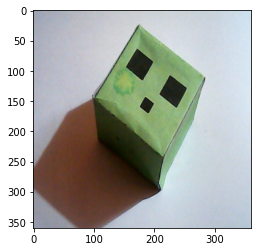

In [ ]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt


path="Train/Slime/Slime_12.jpg"
img=cv.imread(path)
img = cv.resize(img,(360,360))
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)


In [ ]:
img = img/255
img = np.expand_dims(img,axis=0)
img_tensor = np.vstack([img])
classes = model.predict(img)
print("Precisión: ",classes[0,np.argmax(classes)])
print("Objeto: ",Objetos[np.argmax(classes)])

Precisión:  0.99949837
Objeto:  Slime
